# Modeling and Simulation in Python

Chapter 4

Copyright 2017 Allen Downey

License: [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0)


In [36]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim library
from modsim import *
import copy
import collections


## Returning values

Here's a simple function that returns a value:

In [2]:
def add_five(x):
    return x + 5

And here's how we call it.

In [3]:
y = add_five(3)

8

If you run a function on the last line of a cell, Jupyter displays the result:

In [4]:
add_five(5)

10

But that can be a bad habit, because usually if you call a function and don't assign the result in a variable, the result gets discarded.

In the following example, Jupyter shows the second result, but the first result just disappears.

In [5]:
add_five(3)
add_five(5)

10

When you call a function that returns a variable, it is generally a good idea to assign the result to a variable.

In [6]:
y1 = add_five(3)
y2 = add_five(5)

print(y1, y2)

8 10


**Exercise:** Write a function called `make_state` that creates a `State` object with the state variables `olin=10` and `wellesley=2`, and then returns the new `State` object.

Write a line of code that calls `make_state` and assigns the result to a variable named `init`.

In [7]:
# ===================================================================================
def make_state(data = {}):
    """Return an initial State object
    
    Parameters:
        data (dict): dictionary of locations with number of bikes at each (default {0.0})
            example: {'olin': 10, 'wellesey': 2}
    
    Returns:
        State: state object initialized with data items
    """
    locations_state = State(**data)
    return locations_state


# ===================================================================================

# define locations
locations = {'olin'           : 10, 
             'wellesey'       : 2,
             'olin_empty'     : 0,
             'wellesley_empty': 0}

init = make_state(locations)

,values
olin,10
wellesey,2
olin_empty,0
wellesley_empty,0


## Running simulations

Here's the code from the previous notebook.

In [8]:
# ===================================================================================
def step(state, p1, p2):
    """Simulate one minute of time.
    
    state: bikeshare State object
    p1: probability of an Olin->Wellesley customer arrival
    p2: probability of a Wellesley->Olin customer arrival
    """
    if flip(p1):
        bike_to_wellesley(state)
    
    if flip(p2):
        bike_to_olin(state)
        
# ===================================================================================
def bike_to_wellesley(state):
    """Move one bike from Olin to Wellesley.
    
    state: bikeshare State object
    """
    if state.olin == 0:
        state.olin_empty += 1
        return
    
    state.olin -= 1
    state.wellesley += 1
    
# ===================================================================================
def bike_to_olin(state):
    """Move one bike from Wellesley to Olin.
    
    state: bikeshare State object
    """
    if state.wellesley == 0:
        state.wellesley_empty += 1
        return
    
    state.wellesley -= 1
    state.olin += 1
    
# ===================================================================================
def decorate_bikeshare():
    """Add a title and label the axes."""
    decorate(title='Olin-Wellesley Bikeshare',
             xlabel='Time step (min)', 
             ylabel='Number of bikes')

Here's a modified version of `run_simulation` that creates a `State` object, runs the simulation, and returns the `State` object.

In [14]:
def run_simulation(init_state, p1, p2, num_steps=1):
    """Simulate the given number of time steps.
    
    p1: probability of an Olin->Wellesley customer arrival
    p2: probability of a Wellesley->Olin customer arrival
    num_steps: number of time steps
    """
    state = copy.deepcopy(init)
                    
    for i in range(num_steps):
        step(state, p1, p2)
        
    return state

Now `run_simulation` doesn't plot anything:

In [19]:
# define locations
locations = {'olin'           : 10, 
             'wellesley'      : 2,
             'olin_empty'     : 0,
             'wellesley_empty': 0}

init = make_state(locations)

state = run_simulation(init, 0.4, 0.2, 60)

,values
olin,2
wellesley,10
olin_empty,0
wellesley_empty,0


But after the simulation, we can read the metrics from the `State` object.

In [20]:
state.olin_empty

0

Now we can run simulations with different values for the parameters.  When `p1` is small, we probably don't run out of bikes at Olin.

In [21]:
state = run_simulation(init, 0.2, 0.2, 60)
state.olin_empty

0

When `p1` is large, we probably do.

In [22]:
state = run_simulation(init, 0.6, 0.2, 60)
state.olin_empty

9

## More for loops

`linspace` creates a NumPy array of equally spaced numbers.

In [23]:
p1_array = linspace(0, 1, 5)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

We can use an array in a `for` loop, like this:

In [24]:
for p1 in p1_array:
    print(p1)

0.0
0.25
0.5
0.75
1.0


This will come in handy in the next section.

`linspace` is defined in `modsim.py`.  You can get the documentation using `help`.

In [25]:
help(linspace)

Help on function linspace in module modsim.modsim:

linspace(start, stop, num=50, **options)
    Returns an array of evenly-spaced values in the interval [start, stop].
    
    start: first value
    stop: last value
    num: number of values
    
    Also accepts the same keyword arguments as np.linspace.  See
    https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html
    
    returns: array or Quantity



`linspace` is based on a NumPy function with the same name.  [Click here](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html) to read more about how to use it.

**Exercise:** 
Use `linspace` to make an array of 10 equally spaced numbers from 1 to 10 (including both).

In [26]:
linspace(1, 10, 10)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

**Exercise:** The `modsim` library provides a related function called `linrange`.  You can view the documentation by running the following cell:

In [27]:
help(linrange)

Help on function linrange in module modsim.modsim:

linrange(start=0, stop=None, step=1, endpoint=False, **options)
    Returns an array of evenly-spaced values in an interval.
    
    By default, the last value in the array is `stop-step`
    (at least approximately).
    If you provide the keyword argument `endpoint=True`,
    the last value in the array is `stop`.
    
    This function works best if the space between start and stop
    is divisible by step; otherwise the results might be surprising.
    
    start: first value
    stop: last value
    step: space between values
    
    returns: NumPy array



Use `linrange` to make an array of numbers from 1 to 11 with a step size of 2.

In [28]:
linrange(1, 12, 2)

array([ 1,  3,  5,  7,  9, 11])

## Sweeping parameters

`p1_array` contains a range of values for `p1`.

In [29]:
p2 = 0.2
num_steps = 60
p1_array = linspace(0, 1, 11)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

The following loop runs a simulation for each value of `p1` in `p1_array`; after each simulation, it prints the number of unhappy customers at the Olin station:

In [31]:
for p1 in p1_array:
    state = run_simulation(init, p1, p2, num_steps)
    print(p1, state.olin_empty)

0.0 0
0.1 0
0.2 0
0.30000000000000004 0
0.4 8
0.5 10
0.6000000000000001 11
0.7000000000000001 16
0.8 18
0.9 32
1.0 39


Now we can do the same thing, but storing the results in a `SweepSeries` instead of printing them.



In [32]:
sweep = SweepSeries()

for p1 in p1_array:
    state = run_simulation(init, p1, p2, num_steps)
    sweep[p1] = state.olin_empty

And then we can plot the results.

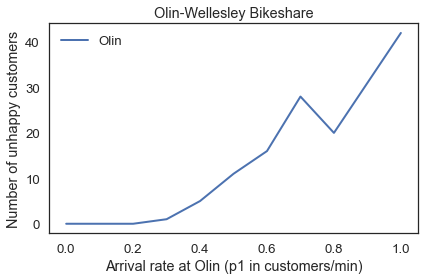

In [33]:
plot(sweep, label='Olin')

decorate(title='Olin-Wellesley Bikeshare',
         xlabel='Arrival rate at Olin (p1 in customers/min)', 
         ylabel='Number of unhappy customers')

## Exercises

**Exercise:** Wrap this code in a function named `sweep_p1` that takes an array called `p1_array` as a parameter.  It should create a new `SweepSeries`, run a simulation for each value of `p1` in `p1_array`, store the results in the `SweepSeries`, and return the `SweepSeries`.

Use your function to plot the number of unhappy customers at Olin as a function of `p1`.  Label the axes.

In [37]:
# ===================================================================================
def make_state(data = {}):
    """Return an initial State object
    
    Parameters:
        data (dict): dictionary of locations with number of bikes at each (default {0.0})
            example: {'olin': 10, 'wellesey': 2}
    
    Returns:
        State: state object initialized with data items
    """
    locations_state = State(**data)
    return locations_state

# ===================================================================
def run_simulation(init_state, p1, p2, num_steps):
    """Simulate the given number of time steps.
    
    p1: probability of an Olin->Wellesley customer arrival
    p2: probability of a Wellesley->Olin customer arrival
    num_steps: number of time steps
    """
    state = copy.deepcopy(init_state)

    for i in range(num_steps):
        step(state, p1, p2)
        
    return state

# ===================================================================
def sweep_params(init_state, p1_array=None, p2_array=None, num_steps=50, num_runs=1):
    """Given possible values for p1 and p2, loop thru each and run a simulation.  If an int or float
    is passed, that parameter will be fixed (not swept).  If a list is provided, then we will loop
    and sweep that parameter.
    
    Parameters:
        locations (list): List of available locations
        init (State): State object to use - should be preinitialized
        p1_array (int | list): probability values (default 0.5)
        p2_array (int | list): probability values (default 0.5)
        num_steps (int): number of steps to simulate (default 50)
        num_runs (int): number of runs to do (default 1)
    """
    # make sure p1_array is a list, assign defult if necessary
    p1_array = [0.5] if p1_array is None else p1_array
    p1_array = p1_array if isinstance(p1_array, collections.Sequence) else [p1_array]
    
    # make sure p2_array is a list, assign defult if necessary
    p2_array = [0.5] if p2_array is None else p2_array
    p2_array = p2_array if isinstance(p2_array, collections.Sequence) else [p2_array]

    sweep_p1 = SweepSeries()
    sweep_p2 = SweepSeries()
    
    # This loop supports sweeping 1 or more paramtere values and does a grid search
    for p1 in p1_array:
        for p2 in p2_array:   
            for runs in range(num_runs):
                state = run_simulation(init_state, p1, p2, num_steps)

                if len(p1_array) == 1 and len(p2_array) > 1:
                    i = j = p2

                elif len(p2_array) == 1 and len(p1_array) > 1:
                    i = j = p1

                else:
                    i = p1
                    j = p2

                sweep_p1[i] = (sweep_p1[i] + state.olin_empty) if i in sweep_p1 else state.olin_empty
                sweep_p2[j] = (sweep_p1[j] + state.wellesley_empty) if j in sweep_p2 else state.wellesley_empty
    
    # We want to average the results of the number of runs
    sweep_p1 = sweep_p1 / num_runs
    sweep_p2 = sweep_p2 / num_runs
                 
    return sweep_p1, sweep_p2


# ===================================================================
def setup_locations(locations):
    """Given list of locations, return an initial state and pretty names"""
    l1_name = locations[0][0].capitalize()
    l2_name = locations[1][0].capitalize()

    # ----- initialize location State object for sims ------
    location_state = {}

    for loc, start in locations:
        location_state[loc] = start
        location_state[f'{loc}_empty'] = 0

    init_state = make_state(location_state)
    
    return init_state, l1_name, l2_name

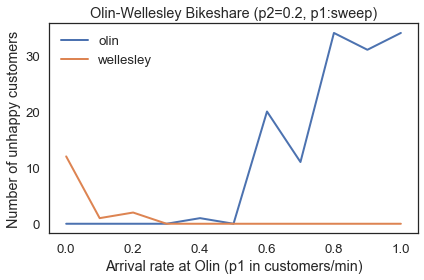

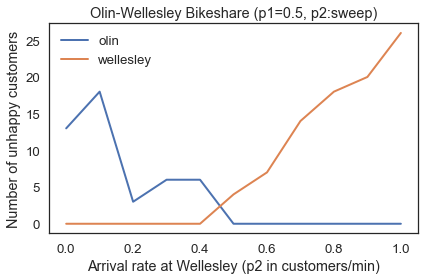

In [38]:
# ---- Initialize Sim Parameters -----
num_steps = 60
num_runs = 1
locations = [('olin', 10), ('wellesley', 2)]

init_state, l1_name, l2_name = setup_locations(locations)

# ----- Sweep p1 Example -----
p1 = linspace(0, 1, 11).tolist()
p2 = 0.2

sweep1, sweep2 = sweep_params(init_state, p1, p2, num_steps, num_runs)

plot(sweep1, label=locations[0][0])
plot(sweep2, label=locations[1][0])

decorate(title=f'{l1_name}-{l2_name} Bikeshare (p2={p2}, p1:sweep)',
         xlabel=f'Arrival rate at {l1_name} (p1 in customers/min)', 
         ylabel=f'Number of unhappy customers')
plt.show()

# ----- Sweep p2 Example -----
p1 = 0.5
p2 = linspace(0, 1, 11).tolist()

sweep1, sweep2 = sweep_params(init_state, p1, p2, num_steps, num_runs)

plot(sweep1, label=locations[0][0])
plot(sweep2, label=locations[1][0])

decorate(title=f'{l1_name}-{l2_name} Bikeshare (p1={p1}, p2:sweep)',
         xlabel=f'Arrival rate at {l2_name} (p2 in customers/min)', 
         ylabel=f'Number of unhappy customers')
plt.show()


**Exercise:** Write a function called `sweep_p2` that runs simulations with `p1=0.5` and a range of values for `p2`.  It should store the results in a `SweepSeries` and return the `SweepSeries`.


>  See solution above - I combined sweeping p1 and p2 into a single function

## Optional Exercises

The following two exercises are a little more challenging.  If you are comfortable with what you have learned so far, you should give them a try.  If you feel like you have your hands full, you might want to skip them for now.

**Exercise:** Because our simulations are random, the results vary from one run to another, and the results of a parameter sweep tend to be noisy.  We can get a clearer picture of the relationship between a parameter and a metric by running multiple simulations with the same parameter and taking the average of the results.

Write a function called `run_multiple_simulations` that takes as parameters `p1`, `p2`, `num_steps`, and `num_runs`.

`num_runs` specifies how many times it should call `run_simulation`.

After each run, it should store the total number of unhappy customers (at Olin or Wellesley) in a `TimeSeries`.  At the end, it should return the `TimeSeries`.

Test your function with parameters

```
p1 = 0.3
p2 = 0.3
num_steps = 60
num_runs = 10
```

Display the resulting `TimeSeries` and use the `mean` function provided by the `TimeSeries` object to compute the average number of unhappy customers (see Section 2.7).

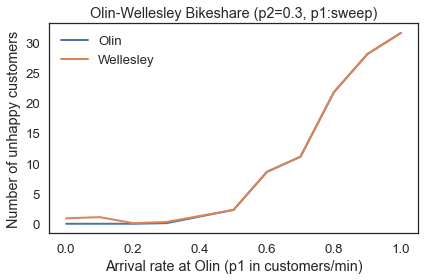

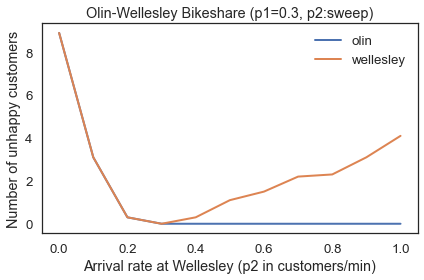

In [39]:
# ---- Initialize Sim Parameters -----
num_steps = 60
num_runs = 10
locations = [('olin', 10), ('wellesley', 2)]

init_state, l1_name, l2_name = setup_locations(locations)


# ----- Sweep p1 Example -----
p1 = linspace(0, 1, 11).tolist()
p2 = 0.3

sweep1, sweep2 = sweep_params(init_state, p1, p2, num_steps, num_runs)

plot(sweep1, label=l1_name)
plot(sweep2, label=l2_name)

decorate(title=f'{l1_name}-{l2_name} Bikeshare (p2={p2}, p1:sweep)',
         xlabel=f'Arrival rate at {l1_name} (p1 in customers/min)', 
         ylabel=f'Number of unhappy customers')
plt.show()


# ----- Sweep p2 Example -----
p1 = 0.3
p2 = linspace(0, 1, 11).tolist()

sweep1, sweep2 = sweep_params(init_state, p1, p2, num_steps, num_runs)

plot(sweep1, label=locations[0][0])
plot(sweep2, label=locations[1][0])

decorate(title=f'{l1_name}-{l2_name} Bikeshare (p1={p1}, p2:sweep)',
         xlabel=f'Arrival rate at {l2_name} (p2 in customers/min)', 
         ylabel=f'Number of unhappy customers')
plt.show()

**Exercise:**  Continuting the previous exercise, use `run_multiple_simulations` to run simulations with a range of values for `p1` and

```
p2 = 0.3
num_steps = 60
num_runs = 20
```

Store the results in a `SweepSeries`, then plot the average number of unhappy customers as a function of `p1`.  Label the axes.

What value of `p1` minimizes the average number of unhappy customers?

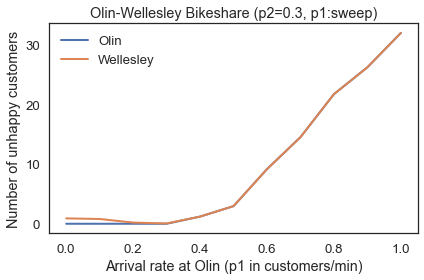

0.0     0.90
0.1     0.80
0.2     0.20
0.3     0.05
0.4     2.40
0.5     5.90
0.6    18.30
0.7    29.00
0.8    43.40
0.9    52.40
1.0    63.90
dtype: float64

Minimum occurs at p1=0.3 where we have an average number of unhappy customers of 0.05


In [51]:
# ---- Initialize Sim Parameters -----
num_steps = 60
num_runs = 20
locations = [('olin', 10), ('wellesley', 2)]

init_state, l1_name, l2_name = setup_locations(locations)

# ----- Sweep p1 Example -----
p1 = linspace(0, 1, 11).tolist()
p2 = 0.3

sweep1, sweep2 = sweep_params(init_state, p1, p2, num_steps, num_runs)

plot(sweep1, label=l1_name)
plot(sweep2, label=l2_name)

decorate(title=f'{l1_name}-{l2_name} Bikeshare (p2={p2}, p1:sweep)',
         xlabel=f'Arrival rate at {l1_name} (p1 in customers/min)', 
         ylabel=f'Number of unhappy customers')
plt.show()

tot_unhappy = (sweep1+sweep2)
print(tot_unhappy)

tot_unhappy_list = tot_unhappy.tolist()
min_unhappy = min(tot_unhappy_list)
min_unhappy_idx = tot_unhappy_list.index(min(tot_unhappy_list))
min_unhappy_p = round(tot_unhappy.index[min_unhappy_idx], 1)

print(f'\nMinimum occurs at p1={min_unhappy_p} where we have an average number of unhappy customers of {min_unhappy}')

**Note: I ran the simulation a number of times with num_runs=20 and saw different outcomes with p1 varying from 0.1 to 0.3.**

### Run with num_runs=1000

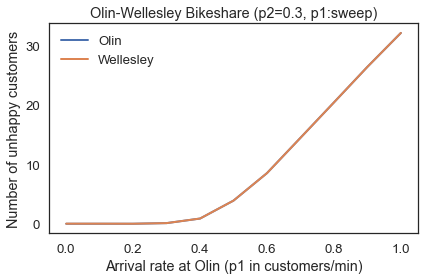

0.0     0.016
0.1     0.016
0.2     0.008
0.3     0.218
0.4     1.758
0.5     7.804
0.6    17.066
0.7    28.952
0.8    40.876
0.9    52.858
1.0    64.288
dtype: float64

Minimum occurs at p1=0.2 where we have an average number of unhappy customers of 0.008


In [54]:
# ---- Initialize Sim Parameters -----
num_steps = 60
num_runs = 1000
locations = [('olin', 10), ('wellesley', 2)]

init_state, l1_name, l2_name = setup_locations(locations)

# ----- Sweep p1 Example -----
p1 = linspace(0, 1, 11).tolist()
p2 = 0.3

sweep1, sweep2 = sweep_params(init_state, p1, p2, num_steps, num_runs)

plot(sweep1, label=l1_name)
plot(sweep2, label=l2_name)

decorate(title=f'{l1_name}-{l2_name} Bikeshare (p2={p2}, p1:sweep)',
         xlabel=f'Arrival rate at {l1_name} (p1 in customers/min)', 
         ylabel=f'Number of unhappy customers')
plt.show()

tot_unhappy = (sweep1+sweep2)
print(tot_unhappy)

tot_unhappy_list = tot_unhappy.tolist()
min_unhappy = min(tot_unhappy_list)
min_unhappy_idx = tot_unhappy_list.index(min(tot_unhappy_list))
min_unhappy_p = round(tot_unhappy.index[min_unhappy_idx], 1)
print(f'\nMinimum occurs at p1={min_unhappy_p} where we have an average number of unhappy customers of {min_unhappy}')